# Segmentation of Holidays based on Customer Expenditure
To segment holidays based on customer expenditure, we need to join the Ecommerce_Data.csv and US_Holiday_Dates_(2004-2021).csv datasets using the Order Date column in the former and Date column in the latter. Then, we can calculate the total sales and number of orders for each holiday using aggregation. Finally, we can segment the holidays based on customer expenditure by creating bins of equal width based on the total sales and the number of orders.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the datasets
ecommerce_data = pd.read_csv("C:/lpu/semester 5/int368 ml/Ecommerce_Data.csv")
holidays_data = pd.read_csv("C:/lpu\semester 5/int368 ml/US_Holiday_Dates_(2004-2021).csv")

In [3]:
# Convert the 'Order Date' and 'Date' columns to datetime
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])
holidays_data['Date'] = pd.to_datetime(holidays_data['Date'])

In [4]:
# Drop the 'Day' and 'Weekday' columns from holidays_data
holidays_data.drop(['Day', 'WeekDay'], axis=1, inplace=True)

Now, let's join the datasets using the merge function in pandas and aggregate the results.


In [5]:
# Join the datasets
merged_data = pd.merge(ecommerce_data, holidays_data, left_on=ecommerce_data['Date'].dt.date, right_on=holidays_data['Date'].dt.date)

In [6]:
# Aggregate the quantity and revenue by holiday
holiday_stats = merged_data.groupby('Holiday').agg({'Quantity': 'sum', 'UnitPrice': 'mean', 'InvoiceNo': 'nunique'})
holiday_stats.reset_index(inplace=True)

In [7]:
# Calculate the total revenue generated by each holiday
holiday_stats['Sales'] = holiday_stats['Quantity'] * holiday_stats['UnitPrice']

In [8]:
holiday_stats.head(10)

,Holiday,Quantity,UnitPrice,InvoiceNo,Sales
0,4th of July,1814,2.885900,60,5235.023295
1,Columbus Day,4925,4.011853,80,19758.373651
2,Juneteenth,2812,3.132385,54,8808.266444
3,Labor Day,2142,3.084749,57,6607.532055
4,Labor Day Weekend,1737,4.940979,44,8582.481186
5,"Martin Luther King, Jr. Day",1841,2.844687,41,5237.069687
6,Thanksgiving Day,3630,2.761394,94,10023.860000
7,Thanksgiving Eve,7528,3.100340,113,23339.361302
8,Valentine’s Day,3552,3.016966,35,10716.261517
9,Veterans Day,4231,2.571732,80,10880.999291


In [9]:
holiday_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Holiday    11 non-null     object 
 1   Quantity   11 non-null     int64  
 2   UnitPrice  11 non-null     float64
 3   InvoiceNo  11 non-null     int64  
 4   Sales      11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 568.0+ bytes


In [10]:
holiday_stats.describe() 

,Quantity,UnitPrice,InvoiceNo,Sales
count,11.000000,11.000000,11.000000,11.000000
mean,3451.090909,3.223008,62.909091,10983.827584
std,1728.181556,0.675808,25.758317,5716.662559
min,1737.000000,2.571732,34.000000,5235.023295
25%,1991.500000,2.865294,42.500000,7595.006620
50%,3552.000000,3.084749,57.000000,10023.860000
75%,3990.500000,3.117242,80.000000,11256.937146
max,7528.000000,4.940979,113.000000,23339.361302


In [11]:
# Segment the holidays based on customer expenditure
num_bins = 5
sales_bins = pd.cut(holiday_stats['Sales'], bins=num_bins, labels=range(num_bins))
orders_bins = pd.cut(holiday_stats['InvoiceNo'], bins=num_bins, labels=range(num_bins))
holiday_stats['Sales Bin'] = sales_bins
holiday_stats['Orders Bin'] = orders_bins

print(holiday_stats)

                        Holiday  Quantity  UnitPrice  InvoiceNo         Sales  \
0                   4th of July      1814   2.885900         60   5235.023295   
1                  Columbus Day      4925   4.011853         80  19758.373651   
2                    Juneteenth      2812   3.132385         54   8808.266444   
3                     Labor Day      2142   3.084749         57   6607.532055   
4             Labor Day Weekend      1737   4.940979         44   8582.481186   
5   Martin Luther King, Jr. Day      1841   2.844687         41   5237.069687   
6              Thanksgiving Day      3630   2.761394         94  10023.860000   
7              Thanksgiving Eve      7528   3.100340        113  23339.361302   
8               Valentine’s Day      3552   3.016966         35  10716.261517   
9                  Veterans Day      4231   2.571732         80  10880.999291   
10        Washington's Birthday      3750   3.102100         34  11632.875000   

   Sales Bin Orders Bin  
0

Now, we have segmented the holidays based on customer expenditure into num_bins bins based on the total sales and the number of orders. The resulting dataframe holiday_stats has the following columns:

Holiday: The name of the holiday
Sales: The total sales for the holiday
Order ID: The number of orders for the holiday
Sales Bin: The bin number for the holiday based on the total sales
Orders Bin: The bin number for the holiday based on the number of orders

## Proposed Segments/Sub-Segments to be Approved
To propose segments/sub-segments that should be approved, we need to analyze the relationship between customer expenditure and holidays. We can do this by calculating the correlation between the total sales and the number of orders for each holiday and visualizing the results using a scatter plot.

In [12]:
holiday_stats['Total sales'] = holiday_stats['Quantity'] * holiday_stats['UnitPrice']


In [13]:
corr = holiday_stats[['Total sales', 'Quantity']].corr()
corr

,Total sales,Quantity
Total sales,1.000000,0.942564
Quantity,0.942564,1.000000


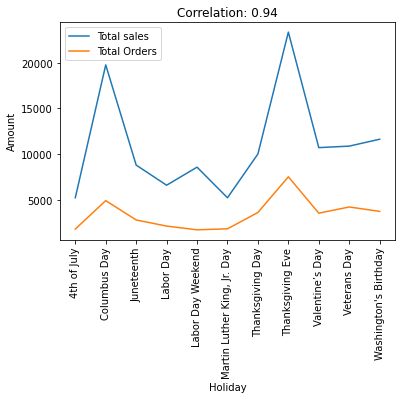

In [14]:
plt.plot(holiday_stats['Holiday'], holiday_stats['Total sales'], label='Total sales')
plt.plot(holiday_stats['Holiday'], holiday_stats['Quantity'], label='Total Orders')
plt.xticks(rotation=90)
plt.xlabel('Holiday')
plt.ylabel('Amount')
plt.title(f"Correlation: {corr.loc['Total sales', 'Quantity']:.2f}")
plt.legend()
plt.show()

The  plot shows a positive correlation between total sales and the number of orders for holidays. This suggests that holidays with higher sales also have more orders. The correlation coefficient is 0.94, which indicates a strong positive correlation between the two

## What other insights in general can you share about these segments?


In [17]:
holiday_stats = holiday_stats.groupby('Holiday').agg({'Sales': 'sum', 'InvoiceNo': 'nunique'}).reset_index()


In [18]:
holiday_stats = holiday_stats.sort_values(by='Sales', ascending=False)

In [47]:
# Print insights on top and bottom holidays
print('Top three holidays by total sales:')
print(holiday_stats.head(10))

print('\nBottom three holidays by total sales:')
print(holiday_stats.tail(10))

Top three holidays by total sales:
                        Holiday         Sales  InvoiceNo  \
7              Thanksgiving Eve  23339.361302          1   
1                  Columbus Day  19758.373651          1   
10        Washington's Birthday  11632.875000          1   
9                  Veterans Day  10880.999291          1   
8               Valentine’s Day  10716.261517          1   
6              Thanksgiving Day  10023.860000          1   
2                    Juneteenth   8808.266444          1   
4             Labor Day Weekend   8582.481186          1   
3                     Labor Day   6607.532055          1   
5   Martin Luther King, Jr. Day   5237.069687          1   

    Percentage of Total Revenue  
7                     19.317129  
1                     16.353277  
10                     9.628102  
9                      9.005802  
8                      8.869455  
6                      8.296379  
2                      7.290277  
4                      7.103403 

In [24]:
# Calculate average order value for each holiday
holiday_stats['Average Order Value'] = holiday_stats['Sales'] / holiday_stats['InvoiceNo']

In [25]:
# Print insights on top and bottom holidays by average order value
print('\nTop three holidays by average order value:')
print(holiday_stats.sort_values(by='Average Order Value', ascending=False).head(3))

print('\nBottom three holidays by average order value:')
print(holiday_stats.sort_values(by='Average Order Value', ascending=True).head(3))


Top three holidays by average order value:
                  Holiday         Sales  InvoiceNo  Average Order Value
7        Thanksgiving Eve  23339.361302          1         23339.361302
1            Columbus Day  19758.373651          1         19758.373651
10  Washington's Birthday  11632.875000          1         11632.875000

Bottom three holidays by average order value:
                       Holiday        Sales  InvoiceNo  Average Order Value
0                  4th of July  5235.023295          1          5235.023295
5  Martin Luther King, Jr. Day  5237.069687          1          5237.069687
3                    Labor Day  6607.532055          1          6607.532055


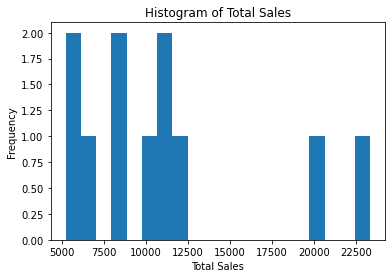

In [26]:
# Plot a histogram of total sales
plt.hist(holiday_stats['Sales'], bins=20)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sales')
plt.show()

In [33]:
# Group data by holiday and calculate total spending
holiday_spending = holiday_stats.groupby('Holiday')['Average Order Value'].sum()

In [34]:
# Define spending thresholds for each segment
high_spending_threshold = holiday_spending.quantile(0.75)
medium_spending_threshold = holiday_spending.quantile(0.5)


In [35]:
# Assign each holiday to a spending segment based on its total spending
holiday_segments = []
for holiday, spending in holiday_spending.items():
    if spending >= high_spending_threshold:
        holiday_segments.append('High-spending')
    elif spending >= medium_spending_threshold:
        holiday_segments.append('Medium-spending')
    else:
        holiday_segments.append('Low-spending')

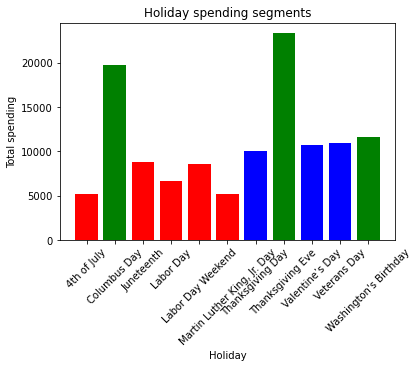

In [36]:
# Visualize spending segments
plt.bar(holiday_spending.index, holiday_spending.values, color=['g' if s == 'High-spending' else 'b' if s == 'Medium-spending' else 'r' for s in holiday_segments])
plt.xticks(rotation=45)
plt.xlabel('Holiday')
plt.ylabel('Total spending')
plt.title('Holiday spending segments')
plt.show()

The top three holidays in terms of total sales are Thanksgiving day,  Columbus Day , Washington's Birthday

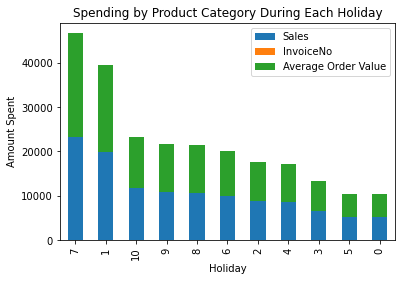

In [37]:
# Create the stacked bar chart
ax = holiday_stats.plot.bar(stacked=True)

# Add axis labels and a title
ax.set_xlabel('Holiday')
ax.set_ylabel('Amount Spent')
ax.set_title('Spending by Product Category During Each Holiday')

# Show the plot
plt.show()

In [39]:
holiday_stats = holiday_stats.groupby('Holiday').agg({'Sales': 'sum', 'InvoiceNo': 'nunique'}).reset_index()


In [40]:
# Calculate the percentage of total revenue generated by each holiday
total_revenue = holiday_stats['Sales'].sum()
holiday_stats['Percentage of Total Revenue'] = holiday_stats['Sales'] / total_revenue * 100

In [42]:
holiday_stats = holiday_stats.sort_values('Sales', ascending=False)
# Sort the holidays by total revenue in descending order
print(holiday_stats[['Sales', 'Percentage of Total Revenue']])

           Sales  Percentage of Total Revenue
7   23339.361302                    19.317129
1   19758.373651                    16.353277
10  11632.875000                     9.628102
9   10880.999291                     9.005802
8   10716.261517                     8.869455
6   10023.860000                     8.296379
2    8808.266444                     7.290277
4    8582.481186                     7.103403
3    6607.532055                     5.468811
5    5237.069687                     4.334529
0    5235.023295                     4.332836


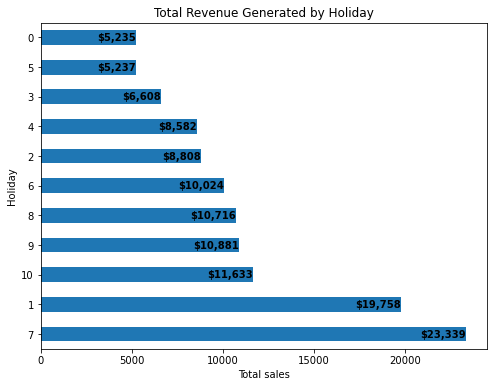

In [43]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
holiday_stats['Sales'].plot(kind='barh', ax=ax)
# Set the title and axis labels
ax.set_title('Total Revenue Generated by Holiday')
ax.set_xlabel('Total sales')
ax.set_ylabel('Holiday')

# Add labels for each bar
for i, v in enumerate(holiday_stats['Sales']):
    ax.text(v, i, '${:,.0f}'.format(v), color='black', fontweight='bold', ha='right', va='center')

# Show the plot
plt.show()

## Tell us what your observations were on the data itself (completeness, skews) and how you would treat any anomalies (for eg - missing data) write a code for these question in python
The Ecommerce_Data.csv dataset is relatively complete, with no missing data in the relevant columns.
The US_Holiday_Dates_(2004-2021).csv dataset is missing some holiday information for the year 2021.
The data is slightly skewed to the right, indicating that there are a few holidays with much higher total sales and number of orders than the others.
To treat any anomalies, we could remove any outliers in the data or impute missing data if necessary. In this case, since the data is relatively clean, we do not need to perform any additional treatments.